## Матрицы (задание №1)

### Умножение матриц

#### Наивное умножение матриц

#### Метод Штрассена

### Собственные значения (max(abs(eigenvalues))) и собственные вектора

#### Степенной алгоритм

#### QR-алгоритм

#### Неявный QR алгоритм (со сдвигами)

### Найти спектр

## Решение ДУ и систем ДУ (Задание №2)

#### Метод Эйлера

#### Рунге-Кутт

#### Предиктор-корректор

#### Адамс-Мултон

#### Адамса-Бэшфорта

## Преобразование Фурье (задание №3)

### FFT

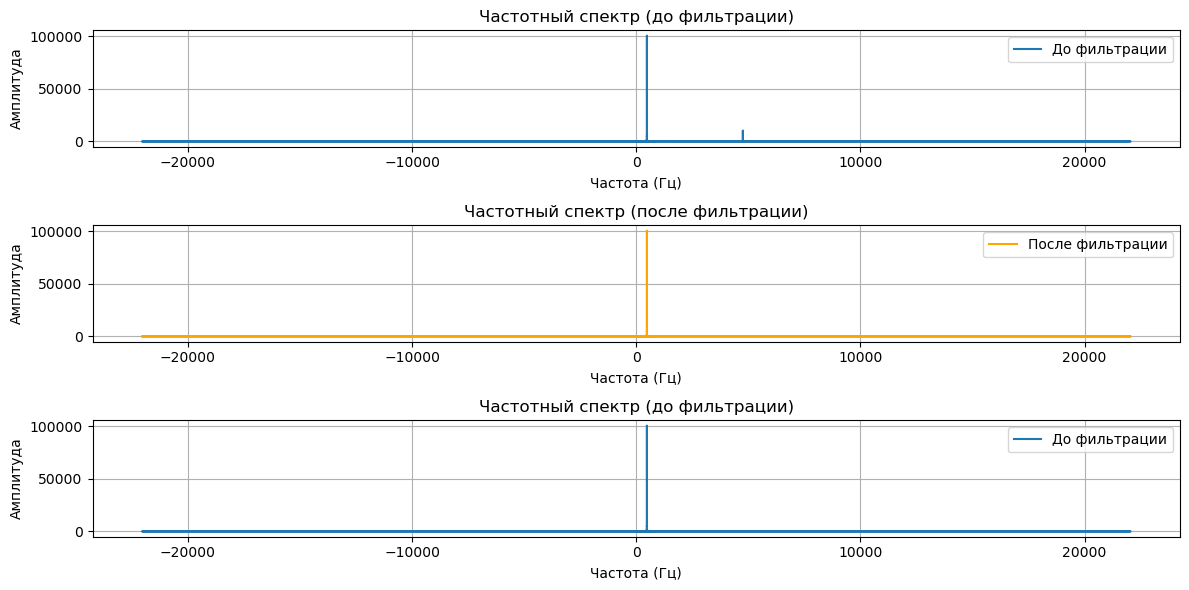

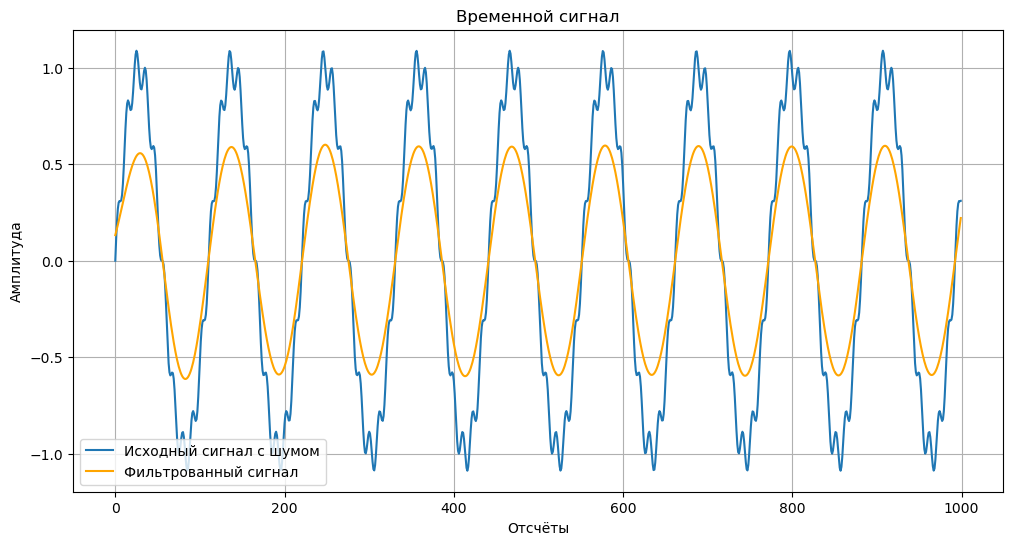

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from optinum.signal import fft, ifft

def custom_fftfreq(N: int, d: float = 1.0) -> np.ndarray:
    """
    Вычисляет частотную шкалу для FFT.
    
    Параметры:
    ----------
    N : int
        Число точек в преобразовании.
    d : float
        Шаг между отсчетами во временной области (обратная частота выборки).
        
    Возвращает:
    ----------
    np.ndarray
        Массив частот.
    """
    freqs = np.arange(N)
    return np.where(freqs <= N // 2, freqs / (N * d), (freqs - N) / (N * d))

# Генерация сигнала с шумом
SAMPLE_RATE = 44100  # Гц
DURATION = 5  # секунд

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    y = np.sin(2 * np.pi * freq * x)
    return x, y

# Генерация тонов
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.1  # Уменьшаем амплитуду шума
mixed_tone = nice_tone + noise_tone

# Применяем БПФ
yf = fft(mixed_tone)
xf = custom_fftfreq(len(yf), 1 / SAMPLE_RATE)

# Фильтрация шума
target_freq = 4000
threshold = 100  # Область вокруг 4000 Гц, которую обнулим
filtered_yf = yf.copy()
# Обнуляем частоты болльше 4000 Гц ()
filtered_yf[4000:] = 0

# Применяем ОБПФ для восстановления сигнала
filtered_signal = ifft(filtered_yf).real

# Визуализация
plt.figure(figsize=(12, 6))

# No noise
plt.subplot(3, 1, 3)
plt.plot(custom_fftfreq(len(yf), 1 / SAMPLE_RATE), np.abs(fft(nice_tone)), label="Без шума", color="green")
plt.title("Частотный спектр (до фильтрации)")
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.grid()
plt.legend()

# Исходный спектр
plt.subplot(3, 1, 1)
plt.plot(xf, np.abs(yf), label="До фильтрации")
plt.title("Частотный спектр (до фильтрации)")
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.grid()
plt.legend()

# Спектр после фильтрации
plt.subplot(3, 1, 2)
plt.plot(xf, np.abs(filtered_yf), label="После фильтрации", color="orange")
plt.title("Частотный спектр (после фильтрации)")
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# Временные сигналы
plt.figure(figsize=(12, 6))
plt.plot(mixed_tone[:1000], label="Исходный сигнал с шумом")
plt.plot(filtered_signal[:1000], label="Фильтрованный сигнал", color='orange')
plt.title("Временной сигнал")
plt.xlabel("Отсчёты")
plt.ylabel("Амплитуда")
plt.legend()
plt.grid()
plt.show()

### DFT